<div class="alert alert-block alert-success">
    
# FIT5196 Task 3 in Assessment 1
#### Student Name: Subbulakshmi Natarajan
#### Student ID: 34069178
#### Student Name: Bhavna Balakrishnan
#### Student ID: 33954437


Date: 30/08/2024


Libraries used:
* re :for regular expression, installed and imported
* pandas: for data manipulation
* json: for converting a file into JSON format
* datatime:for allowing for date and time
* seaborn:to make statistical visualisations
* matplot:To make graphs
*wordcloud:To make text data appear as wordcloud
*geopandas:Extends pandas ability to manipulate and graph data
*shapely.geometry.Point: Help make geometric visuals

    
</div>

** Please note that I have manually uploaded the task 1 output files for the purpose of this task.

[3. Task #3](#task3) <br>
[3.1. Introduction](#Intro3) <br>
[3.2. Exploration](#explore) <br>
[3.3. Summary](#sum3)<br>
[3.4. Reference ](#ref3) <br>

<div class="alert alert-block alert-warning">

# 3. TASK-3: Data Exploratory Analysis <a class="anchor" name="task3"></a>
    
</div>

<div class="alert alert-block alert-success">
    
## 3.1.  Introduction  <a class="anchor" name="Intro3"></a>

In this task, we are supposed to conduct exploratory data analysis (EDA) on the provided data that is Google review data. So the main aim of this goal is to find the insights as well as do any further analysis based on this exploratory analysis.

First we begin by mounting Google drive to access all the input files

In [ ]:
# to run the google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div class="alert alert-block alert-success">
<h2>3.2.  Exploration <a class ="anchor"name="explore"></a>


    
## Understand the sample data taken from task 1

# CSV file

# Loading the file

In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = '/content/task1_group128.csv'
df = pd.read_csv(file_path)

In [ ]:
#Display the first row of the data frame
df.head(5)

,gmap_id,review_count,review_text_count,response_count
0,0x80c2d625124eb845:0x2a5343ac75a24d41,25,25,25
1,0x80deab25f74756d7:0xdb57803e248cc725,20,20,20
2,0x80d94eea65f37acf:0x855db9fc292bbfa9,9,9,9
3,0x80c2b546b53b7b21:0x5759b6727efad7e0,34,34,34
4,0x54d3ffd463931899:0x77f7d0e3ca6ab964,7,7,7


# Information of the dataset

In [ ]:
# Information about the dataframe like data type as well as any null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gmap_id            166 non-null    object
 1   review_count       167 non-null    int64 
 2   review_text_count  167 non-null    int64 
 3   response_count     167 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


# Statistical Information

In [ ]:
# Summarize the statistics of the dataframe
df.describe()

,review_count,review_text_count,response_count
count,167.000000,167.000000,167.000000
mean,28.514970,28.514970,26.377246
std,51.889579,51.889579,45.244798
min,2.000000,2.000000,0.000000
25%,8.000000,8.000000,8.000000
50%,13.000000,13.000000,12.000000
75%,23.500000,23.500000,23.000000
max,358.000000,358.000000,358.000000


# Shape of the dataframe

In [ ]:
df_shape = df.shape
print(f"The DataFrame has {df_shape[0]} rows and {df_shape[1]} columns.")

The DataFrame has 167 rows and 4 columns.


In this data frame, we have 167 rows and 4 columns.

# Missing Values

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
gmap_id              1
review_count         0
review_text_count    0
response_count       0
dtype: int64


In this output, as we can see the gmap_id column has exactly 1 missing value. Identify the missing values is always cruical when we are preprocessing the data values so before that we have to see missing values and make sure to remove the duplicate or null values from the CSV output file

# Distribution of review counts

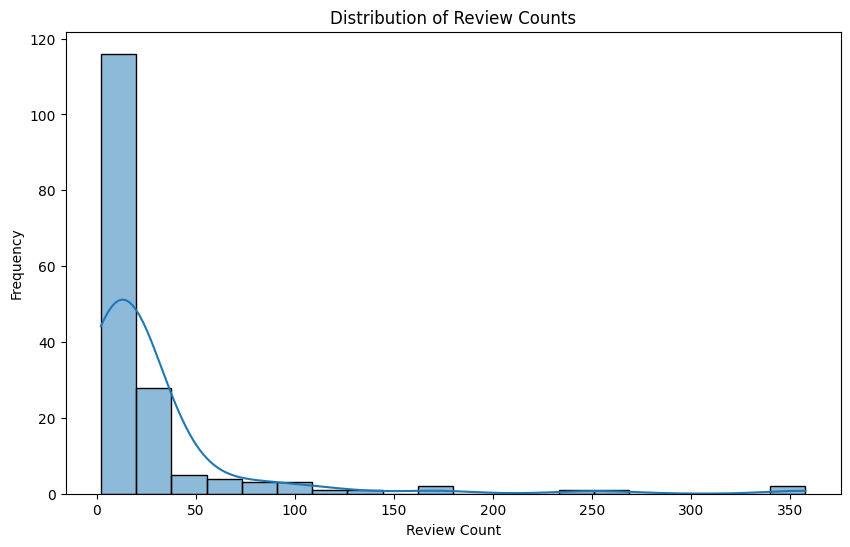

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of review counts
plt.figure(figsize=(10, 6))
sns.histplot(df['review_count'], bins=20, kde=True)
plt.title('Distribution of Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()

# Insight and Analysis

The distribution of review counts reveals that the majority of firms have less than 20 reviews, which is a low figure for most enterprises. As review counts rise, there's a noticeable decline, suggesting that very few companies are able to amass a sizable number of reviews. This draws attention to the difficulties encountered by many companies in getting clients to provide feedback while simultaneously highlighting the achievements of a select few companies who succeed in this field. This distribution points to potential tactics for increasing client feedback and involvement.





# Top 20 gmap_id by number of reviews

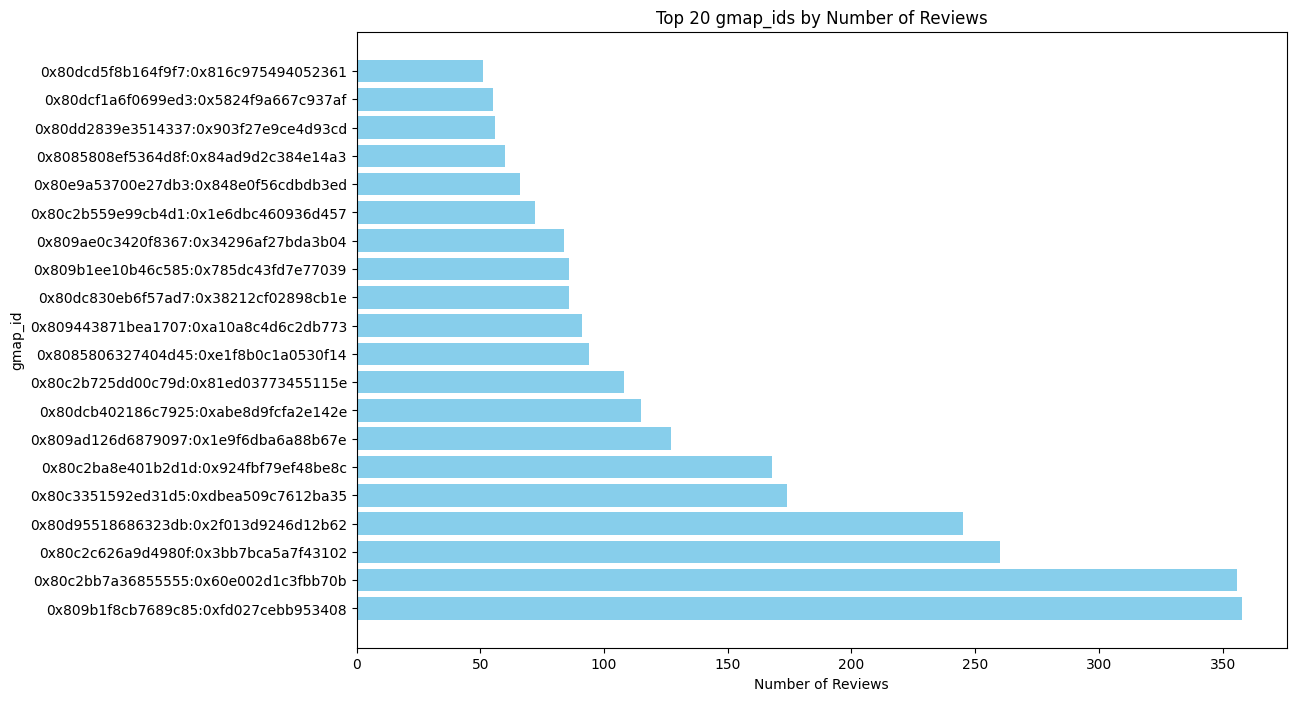

In [ ]:
import matplotlib.pyplot as plt

# Top 20 gmap_ids with the most reviews
top_20 = df.nlargest(20, 'review_count')

plt.figure(figsize=(12, 8))
plt.barh(top_20['gmap_id'], top_20['review_count'], color='skyblue')
plt.xlabel('Number of Reviews')
plt.ylabel('gmap_id')
plt.title('Top 20 gmap_ids by Number of Reviews')
plt.show()


# Insight and Analysis


The firms that have been effective in getting consumer feedback are shown in the bar chart of the top 20 {{gmap_ids}}; the most successful one has received around 350 reviews. This suggests that review soliciting tactics are working well and that customer engagement is significant. The lowest ranking has just over 50 reviews, and there is a noticeable drop in review numbers within the top 20. This discrepancy highlights the different degrees of client participation. Even though the top 20 have done well, there is still opportunity for development, especially for the bottom performers.

# Box Plot of Review counts

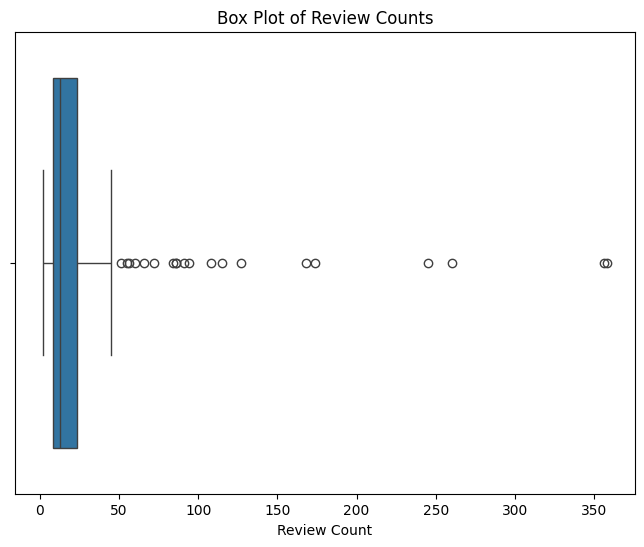

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['review_count'])
plt.title('Box Plot of Review Counts')
plt.xlabel('Review Count')
plt.show()

# Insight and Analysis

The majority of firms have relatively low review counts, with most of them clustered around the lower end of the spectrum, according to the box plot of review counts. Additionally, the plot shows a number of outliers with noticeably larger review counts, suggesting a significant variation in consumer interaction between various businesses. These anomalies imply that whereas the majority of companies have difficulty obtaining a sizable number of evaluations, a select minority have had great success in doing so. This dispersion emphasizes how difficult it is to maintain a consistent level of consumer interaction and how focused initiatives could boost review counts.

# JSON File

In [ ]:
import json
import pandas as pd

# Load the JSON file
file_path = '/content/task1_group128.json'

with open(file_path, 'r') as file:
    data = json.load(file)

# If the JSON is nested, flatten it
flattened_data = []
for gmap_id, value in data.items():  # Use gmap_id as the key
    for item in value['reviews']:
        item['gmap_id'] = gmap_id  # Assign the gmap_id to the item
        flattened_data.append(item)

                 user_id                 time  review_rating  \
0  115728374842901942835  2021-03-22 06:07:33            5.0   
1  113571291692509152083  2021-05-14 18:37:54            3.0   
2  114819709084056830545  2019-12-11 04:00:21            5.0   
3  115494450348039824088  2020-01-08 08:06:23            1.0   
4  101759222167509022378  2020-01-05 04:04:04            5.0   

                                         review_text if_pic pic_dim  \
0  very delicious tacos dinamitas. they offer bir...      N      []   
1  some of the best tacos i've have in a while . ...      N      []   
2  dynamite tacos were okay, was expecting someth...      N      []   
3                                                         N      []   
4                                       did not like      N      []   

  if_response                                gmap_id  
0           Y  0x80c2d625124eb845:0x2a5343ac75a24d41  
1           Y  0x80c2d625124eb845:0x2a5343ac75a24d41  
2           Y  0x80c2d6

# First row and last row of the dataframe

In [ ]:
# Display the first rows of the dataframe
df.head(5)

,user_id,time,review_rating,review_text,if_pic,pic_dim,if_response,gmap_id
0,115728374842901942835,2021-03-22 06:07:33,5.0,very delicious tacos dinamitas. they offer bir...,N,[],Y,0x80c2d625124eb845:0x2a5343ac75a24d41
1,113571291692509152083,2021-05-14 18:37:54,3.0,some of the best tacos i've have in a while . ...,N,[],Y,0x80c2d625124eb845:0x2a5343ac75a24d41
2,114819709084056830545,2019-12-11 04:00:21,5.0,"dynamite tacos were okay, was expecting someth...",N,[],Y,0x80c2d625124eb845:0x2a5343ac75a24d41
3,115494450348039824088,2020-01-08 08:06:23,1.0,,N,[],Y,0x80c2d625124eb845:0x2a5343ac75a24d41
4,101759222167509022378,2020-01-05 04:04:04,5.0,did not like,N,[],Y,0x80c2d625124eb845:0x2a5343ac75a24d41


In [ ]:
#Display the last rows of the dataframe
df.tail(5)

,user_id,time,review_rating,review_text,if_pic,pic_dim,if_response,gmap_id
4757,105092934760087228368,2018-09-28 16:21:29,5.0,none,N,[],N,0x80c2bb7a36855555:0x60e002d1c3fbb70b
4758,105127165867599911672,2017-11-03 02:49:22,5.0,none,N,[],N,0x80c2bb7a36855555:0x60e002d1c3fbb70b
4759,106000572869576519659,2020-07-08 01:10:37,5.0,none,N,[],N,0x80c2bb7a36855555:0x60e002d1c3fbb70b
4760,106791762807489886954,2020-07-30 15:22:52,5.0,none,N,[],N,0x80c2bb7a36855555:0x60e002d1c3fbb70b
4761,113830031943669644273,2020-05-30 13:30:08,5.0,none,N,[],N,0x80c2bb7a36855555:0x60e002d1c3fbb70b


# Information about the dataset

In [ ]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4762 entries, 0 to 4761
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        4760 non-null   object 
 1   time           4762 non-null   object 
 2   review_rating  4760 non-null   float64
 3   review_text    4762 non-null   object 
 4   if_pic         4762 non-null   object 
 5   pic_dim        4762 non-null   object 
 6   if_response    4762 non-null   object 
 7   gmap_id        4762 non-null   object 
dtypes: float64(1), object(7)
memory usage: 297.8+ KB


# Statistical Summary

In [ ]:
# Using describe() to get statistical summary
df.describe()

,review_rating
count,4760.000000
mean,4.353992
std,1.200137
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


from matplotlib import pyplot as plt
_df_0['review_rating'].plot(kind='hist', bins=20, title='review_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['review_rating'].plot(kind='line', figsize=(8, 4), title='review_rating')
plt.gca().spines[['top', 'right']].set_visible(False)

# Shape of the dataframe

In [ ]:
#Shape of the dataframe
df_shape = df.shape
print(f"The DataFrame has {df_shape[0]} rows and {df_shape[1]} columns.")

The DataFrame has 4762 rows and 8 columns.


# Distribution of Review Length

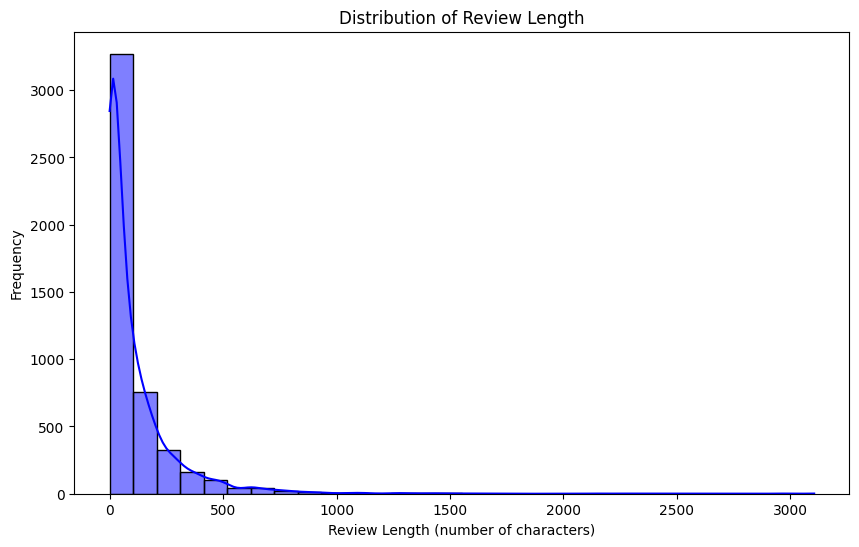

In [ ]:
import seaborn as sns  # Import seaborn
# Convert to DataFrame
df = pd.DataFrame(flattened_data)

# Adding a column for the length of the review text
df['review_length'] = df['review_text'].apply(len)

# Plotting the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True, color='blue')  # Now seaborn can be used
plt.title('Distribution of Review Length')
plt.xlabel('Review Length (number of characters)')
plt.ylabel('Frequency')
plt.show()

# Insight and Analysis

The majority of reviews are somewhat brief, with a notable concentration of evaluations that are less than 500 characters, according to the distribution of review lengths. Longer evaluations are significantly less prevalent, as seen by the distribution's strong rightward skew. This implies that although most customers only submit brief input, a tiny percentage do so in longer, more thorough reviews. The majority of shorter reviews may be an indication of consumers who are more involved and who provide more in-depth insights into their experiences, whilst the lengthier reviews may be a reflection of quick, brief input.

# Review Ratings Distribution

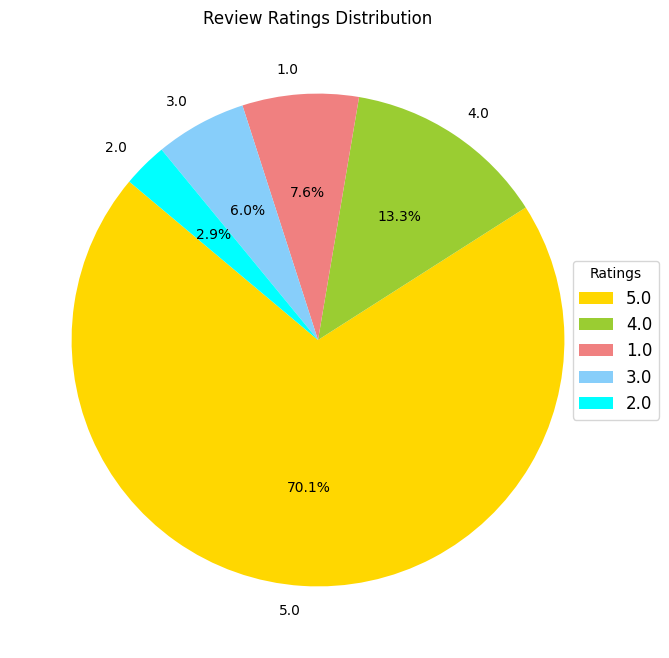

In [ ]:
# Pie chart of review ratings distribution
rating_counts = df['review_rating'].value_counts()

plt.figure(figsize=(8, 8))
# Plotting the pie chart
patches, texts, autotexts = plt.pie(
    rating_counts,
    labels=rating_counts.index,
    autopct='%1.1f%%',
    colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'cyan'],
    startangle=140
)

# Adding the legend inside the pie chart
plt.legend(patches, rating_counts.index, title="Ratings", loc="center left", bbox_to_anchor=(0.9, 0.5), fontsize=12)

# Displaying the pie chart
plt.title('Review Ratings Distribution')
plt.show()

# Insight and Analysis


Customers are typically satisfied, as seen by the pie chart, which shows that 70.1% of reviews have a rating of 5.0 and 13.3% have a rating of 4.0. With 7.6% of evaluations at 1.0, there is a lesser but noticeable presence of lower ratings, indicating areas where businesses may concentrate on enhancing the customer experience. Overall, the chart shows a lot of good feedback, with the lower ratings reflecting chances to resolve specific customer problems.












# Number of reviews over time (2015-2020)

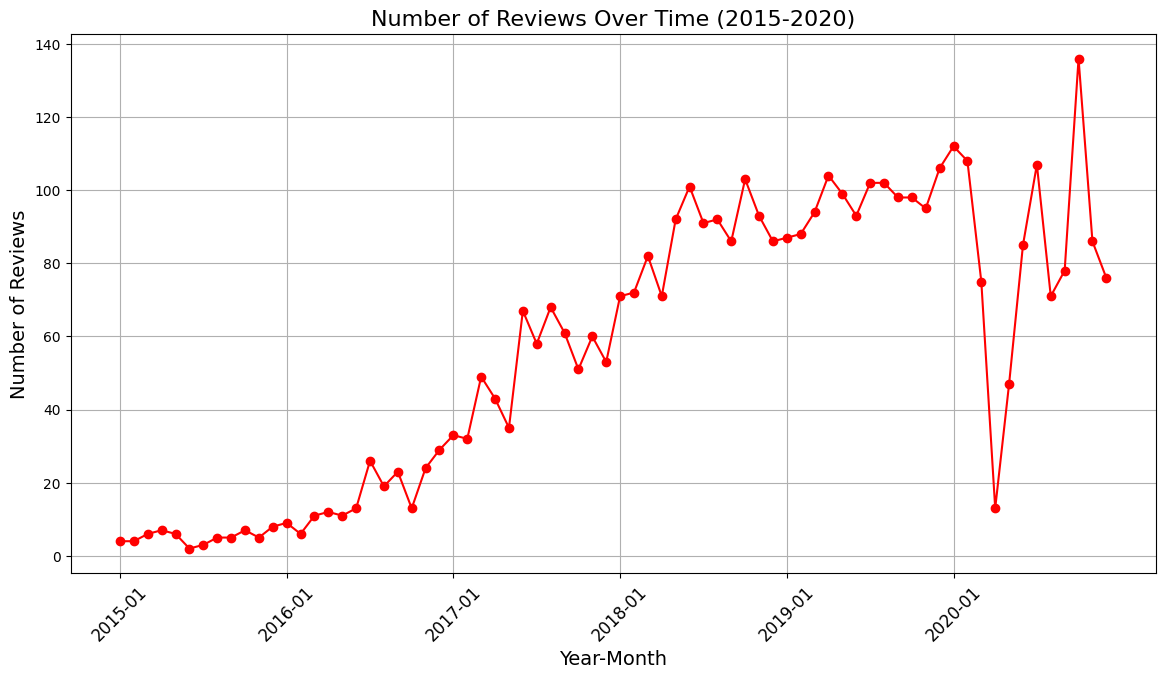

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data transformation of time
df['time'] = pd.to_datetime(df['time'])

# Grouping the data by year and month
df['year_month'] = df['time'].dt.to_period('M')
reviews_over_time = df.groupby('year_month').size()

# Limiting to a specific date range
start_date = '2015-01'
end_date = '2020-12'

# Ensure that `reviews_over_time.index` is of the correct type to be compared with dates
mask = (reviews_over_time.index >= start_date) & (reviews_over_time.index <= end_date)
filtered_reviews = reviews_over_time[mask]

# Plot the filtered data
plt.figure(figsize=(14, 7))
plt.plot(filtered_reviews.index.astype(str), filtered_reviews.values, marker='o', linestyle='-', color='red')
plt.title('Number of Reviews Over Time (2015-2020)', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)

# Display only the start of each year on the x-axis
xticks = filtered_reviews.index[filtered_reviews.index.month == 1].astype(str)
plt.xticks(xticks, rotation=45, fontsize=12)

plt.grid(True)
plt.show()

# Insight and Analysis

The majority of reviews are somewhat brief, with a notable concentration of evaluations that are less than 500 characters, according to the distribution of review lengths. Longer evaluations are significantly less prevalent, as seen by the distribution's strong rightward skew. This implies that although most customers only submit brief input, a tiny percentage do so in longer, more thorough reviews. The majority of shorter reviews may be an indication of consumers who are more involved and who provide more in-depth insights into their experiences, whilst the lengthier reviews may be a reflection of quick, brief input.

# Word cloud for review texts

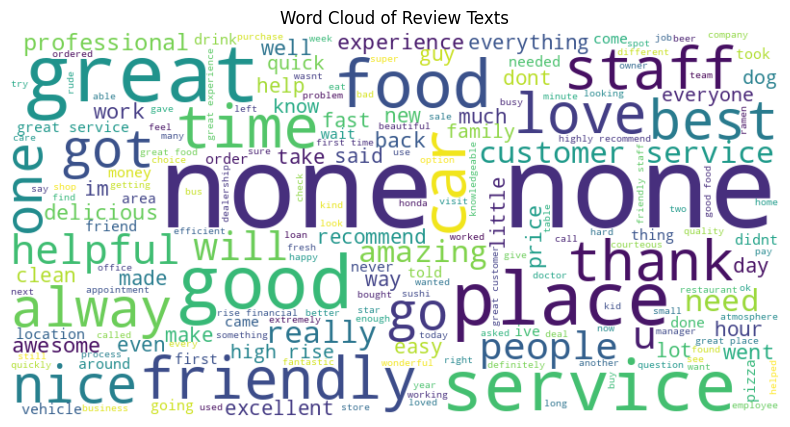

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Combine all review texts into one large string
all_reviews = ' '.join(df['review_text'])

# Preprocess text (remove non-alphabetic characters and convert to lowercase)
all_reviews = re.sub(r'[^a-zA-Z\s]', '', all_reviews).lower()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Texts')
plt.show()

# Insight and Analysis

The most common terms in customer evaluations are graphically represented by the word cloud of review texts. Key phrases like "excellent," "food," "place," "staff," and "service" imply that these features are frequently—and usually favorably—highlighted in client testimonials. Words like "helpful," "friendly," and "nice" keep coming up, which suggests that overall experience and customer service play a big role in how satisfied customers are. On the other hand, if the term "none" appears a lot, it could mean that certain things, like problems or critiques, were left out. This word cloud offers a concise synopsis of the main ideas and opinions shared by clients.

# Auxiliary data - Optional Step

In this section, we will be taking auxiliary metadata which was given to evaluate some useful data in conjunction with the main dataset that is Google Review. We have individually done an eda exploratory for the metadata. Here is the following:

In [ ]:
import pandas as pd
import json
import gzip
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON file
file_path = '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment1/meta-California.json.gz'

# Initialize an empty list to store the data
data = []

# Open the gzip file and read it line by line
with gzip.open(file_path, 'rt', encoding='utf-8') as file:
    for line in file:
        # Parse each line as a separate JSON object
        data.append(json.loads(line))

# Convert the list of JSON objects to a DataFrame
df = pd.json_normalize(data)

In [ ]:
# Inspect the Data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515961 entries, 0 to 515960
Data columns (total 33 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   name                    515951 non-null  object 
 1   address                 508257 non-null  object 
 2   gmap_id                 515961 non-null  object 
 3   description             111921 non-null  object 
 4   latitude                515961 non-null  float64
 5   longitude               515961 non-null  float64
 6   category                513585 non-null  object 
 7   avg_rating              515961 non-null  float64
 8   num_of_reviews          515961 non-null  int64  
 9   price                   109801 non-null  object 
 10  hours                   414982 non-null  object 
 11  MISC                    0 non-null       float64
 12  state                   372248 non-null  object 
 13  relative_results        475497 non-null  object 
 14  url                 

In [ ]:
df.describe()

,latitude,longitude,avg_rating,num_of_reviews,MISC
count,515961.000000,515961.000000,515961.000000,515961.000000,0.0
mean,35.538558,-119.412233,4.278333,136.696334,NaN
std,2.137430,3.410867,0.627410,375.423986,NaN
min,21.881041,-140.173392,1.000000,1.000000,NaN
25%,33.897430,-121.574379,4.000000,8.000000,NaN
50%,34.218867,-118.448297,4.400000,33.000000,NaN
75%,37.680093,-117.868463,4.700000,108.000000,NaN
max,44.393000,180.000000,5.000000,9998.000000,NaN


In [ ]:
# Handle Missing Values
df.fillna({'description': 'No description', 'price': 'Unknown', 'hours': 'Closed'}, inplace=True)

Above, we can see that we have loaded, inspected and dealt with possible missing values in the dataframe using the auxilliary dataset.

# Distribution of Average Rating

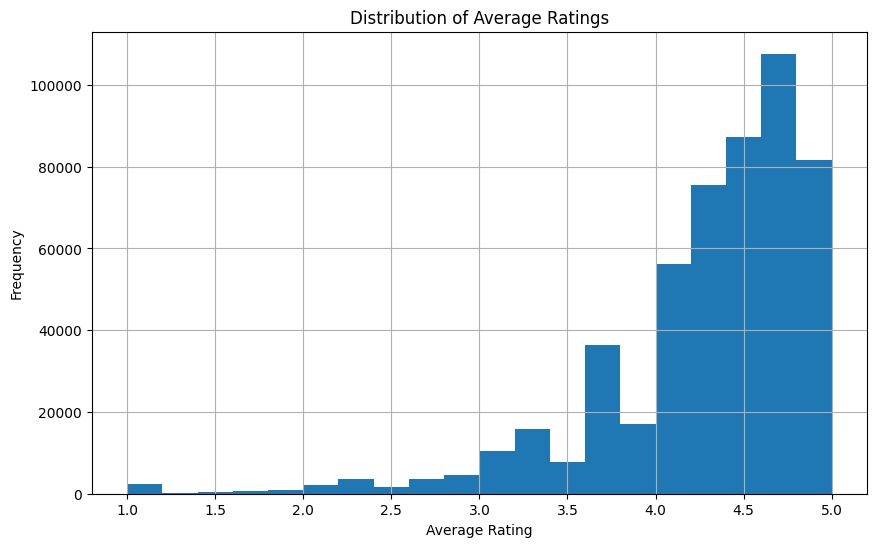

In [ ]:
# Visualize Key Features
plt.figure(figsize=(10, 6))
df['avg_rating'].hist(bins=20)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Insights and Analysis

Most businesses have average ratings between 4.0 and 5.0, indicating high customer satisfaction. Ratings below 3.0 are rare, suggesting that serious satisfaction issues are uncommon. The right-skewed distribution highlights positive ratings, though outlier businesses with lower ratings may need to focus on improving customer satisfaction.

# Correlation Matrix

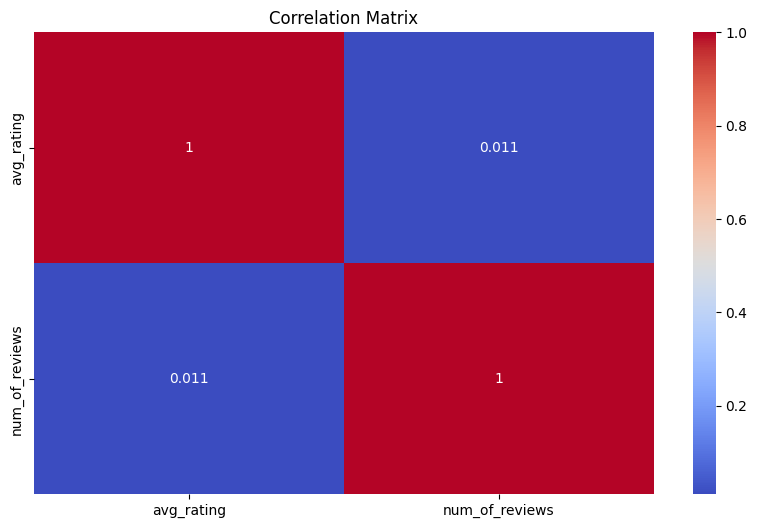

In [ ]:
# Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df[['avg_rating', 'num_of_reviews']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Insight and Analysis

With an extremely low correlation coefficient of 0.011, the correlation matrix between the average rating and the number of reviews shows absolutely no correlation. This implies that there is no discernible correlation between a company's average rating and the quantity of reviews it receives. Stated differently, companies with a greater number of reviews do not always have an average rating that is higher or worse than those with less reviews. This suggests that variables other than the number of reviews could be affecting consumer ratings.

# Geographical Distribution of Business

<ipython-input-31-d36ebe8f6a5b>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


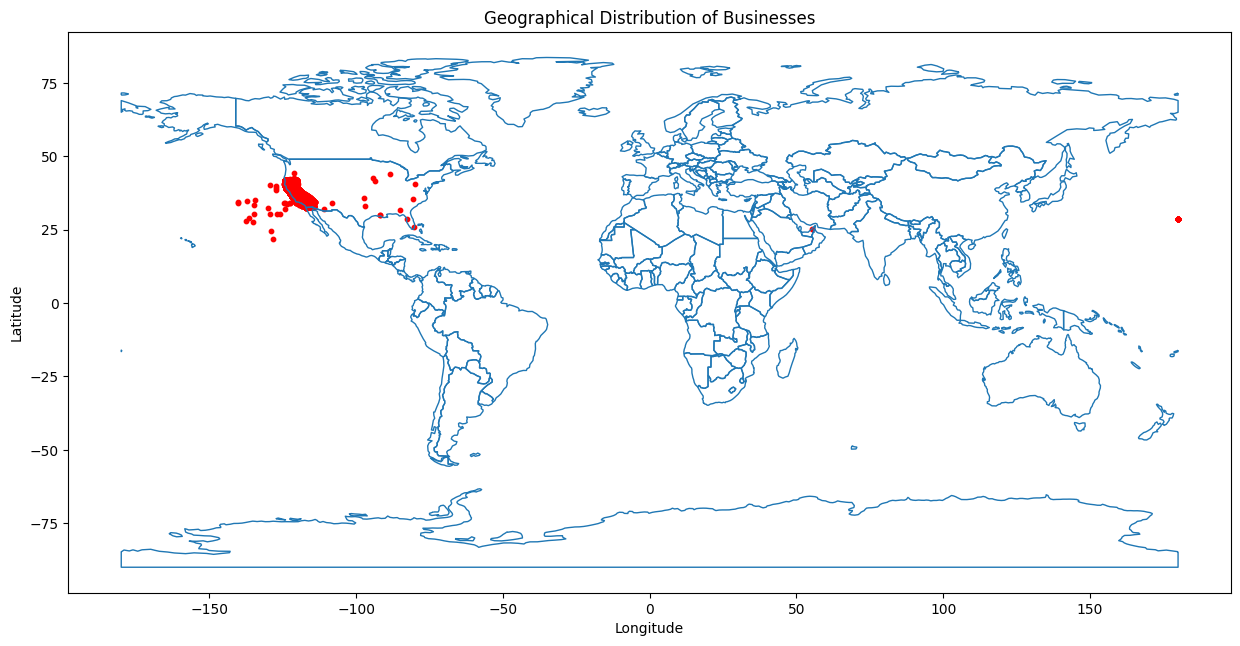

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Convert latitude and longitude to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Create a world map using Geopandas built-in data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
gdf.plot(ax=ax, color='red', markersize=10)

plt.title('Geographical Distribution of Businesses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#Insight

The map shows that most enterprises are concentrated in the U.S., especially in one central area, indicating a focused market. A few businesses are scattered globally, with a notable outlier in the Pacific, suggesting a limited but broader international reach. The U.S. concentration likely influences corporate strategies.

<div class="alert alert-block alert-success">
    
## 3.3. Summary <a class="anchor" name="sum3"></a>

The above insights were drawn by using below methodology-
- Data Loading
- Data inspection
- Identification of anomalies and trends
- Data prprocessing and transformation
- Visualisation
- Interpretation

<div class="alert alert-block alert-success">
    
## 3.4. Reference<a class="anchor" name="ref3"></a>


- (n.d.). Re — Regular expression operations. https://docs.python.org/3/library/re.html
- (n.d.). Json — JSON encoder and decoder. https://docs.python.org/3/library/json.html
- (n.d.). Datetime — Basic date and time types. https://docs.python.org/3/library/datetime.html
- (n.d.). Seaborn: Statistical data visualization. https://seaborn.pydata.org/
- (n.d.). The Shapely User Manual. https://shapely.readthedocs.io/en/stable/manual.html#shapely.geometry.Point